In [1]:
import pandas as pd
house_data = pd.read_csv("House_analysis.csv")
per_capita_per_state = pd.read_csv("counties_per_capita_income.csv")

In [2]:
house_data = house_data.dropna()
print(house_data['state'].unique())

['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut' 'New Jersey'
 'New York' 'New Hampshire' 'Vermont' 'Rhode Island' 'Wyoming' 'Maine'
 'Pennsylvania' 'West Virginia' 'Delaware']


In [3]:
house_data = house_data.drop('city', axis=1)
house_data = house_data.groupby('state')[['bed', 'bath', 'acre_lot', 'house_size', 'price']].mean().reset_index()
house_data

,state,bed,bath,acre_lot,house_size,price
0,Connecticut,3.734578,2.595428,4.043896,2137.818584,5.036526e+05
1,Delaware,3.268307,2.340949,2.106245,2001.388401,3.418941e+05
2,Maine,3.584311,2.334854,18.871728,2198.349848,5.298203e+05
3,Massachusetts,4.098660,2.940243,2.664831,2588.043442,1.056068e+06
4,New Hampshire,3.444631,2.551239,4.884699,2406.068946,6.423393e+05
5,New Jersey,3.603973,2.651123,20.308455,2671.213117,5.754619e+05
6,New York,4.071637,2.952235,17.188104,2299.446362,1.532067e+06
7,Pennsylvania,3.323994,2.250681,0.487157,1807.289672,3.937897e+05
8,Puerto Rico,3.929760,2.441780,8.761339,2103.655556,3.911274e+05
9,Rhode Island,3.833103,2.386799,7.635476,2281.354630,5.267448e+05


In [4]:
US_states = "us-states.json"
import folium

In [5]:
US_map = folium.Map(location=[42, -102], zoom_start=8)
folium.Choropleth(
    geo_data = US_states, # Geo_data to be used
    data = house_data, # Data used for visualization
    columns = ['state', 'price'], # First column is the key to match, second column is the value to display
    key_on = 'feature.properties.name', # The matched key in geo_data
    fill_color = 'OrRd', # Seelct a color scheme
    line_opacity = 0.2, # Select line opacity
    legend_name= 'Average House Value per state (East)', # Choose a name for the legend
).add_to(US_map)
US_map

In [6]:
per_capita_per_state['pci'] = per_capita_per_state['pci'].str.replace('$', '').str.replace(',', '').astype(int)
per_capita_per_state['household_income'] = per_capita_per_state['household_income'].str.replace('$', '').str.replace(',', '').astype(int)
per_capita_per_state['family_income'] = per_capita_per_state['family_income'].str.replace('$', '').str.replace(',', '').astype(int)
per_capita_per_state['population'] = per_capita_per_state['population'].str.replace(',', '').astype(int)
per_capita_per_state['num_of_households'] = per_capita_per_state['num_of_households'].str.replace(',', '').astype(int)

In [7]:
per_capita_per_state

,county,states,pci,household_income,family_income,population,num_of_households
0,New York County,New York,76592,69659,86553,1628706,759460
1,Arlington,Virginia,62018,103208,139244,214861,94454
2,Falls Church City,Virginia,59088,120000,152857,12731,5020
3,Marin,California,56791,90839,117357,254643,102912
4,Santa Clara,California,56248,124055,124055,1927852,640215
...,...,...,...,...,...,...,...
3226,Comerío,Puerto Rico,7047,13523,15799,20778,6075
3227,Western District,American Samoa,6429,24705,24916,31329,5418
3228,Eastern District,American Samoa,6191,23350,24911,23030,3982
3229,Maricao,Puerto Rico,5943,13462,15864,6276,1914


In [8]:
per_capita_per_state = per_capita_per_state.groupby('states')[['pci','household_income','population','num_of_households']].mean().reset_index()
per_capita_per_state

,states,pci,household_income,population,num_of_households
0,Alabama,20481.432836,37778.716418,71631.000000,27443.029851
1,Alaska,29357.655172,62611.344828,24838.482759,8686.172414
2,American Samoa,6911.750000,23292.250000,13879.750000,2422.000000
3,Arizona,20863.933333,42891.266667,431980.200000,158019.266667
4,Arkansas,19443.186667,35861.813333,39111.586667,15062.973333
5,California,27509.327586,56115.827586,651290.086207,216781.000000
6,Colorado,27625.890625,50853.390625,79989.515625,30899.859375
7,Connecticut,36208.500000,70502.875000,447945.125000,169481.125000
8,Delaware,28055.000000,57465.333333,302815.333333,111902.333333
9,Florida,22904.432836,43715.925373,284942.626866,106850.447761


In [9]:
US_map = folium.Map(location=[42, -102], zoom_start=4)
folium.Choropleth(
    geo_data = US_states, # Geo_data to be used
    data = per_capita_per_state, # Data used for visualization
    columns = ['states', 'household_income'], # First column is the key to match, second column is the value to display
    key_on = 'feature.properties.name', # The matched key in geo_data
    fill_color = 'OrRd', # Seelct a color scheme
    line_opacity = 0.2, # Select line opacity
    legend_name= 'Per Capita Income for each US State', # Choose a name for the legend
).add_to(US_map)
US_map

In [ ]:
combined_df.columns

Index(['states', 'bed', 'bath', 'acre_lot', 'house_size', 'price', 'pci',
       'household_income', 'population', 'num_of_households'],
      dtype='object')

In [ ]:
correlation = combined_df['pci'].corr(combined_df['price'])
correlation

0.29182601498848904

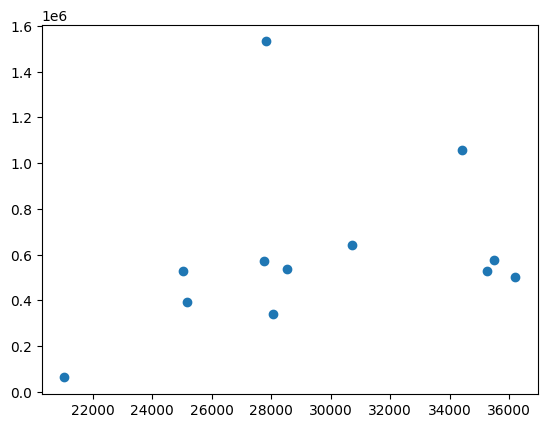

In [ ]:
plt.scatter(combined_df['pci'], combined_df['price'])

In [ ]:
df_pop = pd.read_csv('nst-est2019-alldata.csv')
df_pop

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083
5,40,3,6,1,Alabama,4779736,4780125,4785437,4799069,4815588,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
6,40,4,9,2,Alaska,710231,710249,713910,722128,730443,...,-12.929847,0.587728,1.416798,-0.955359,-11.460949,-7.997118,-3.897349,-10.992765,-13.859140,-12.031221
7,40,4,8,4,Arizona,6392017,6392288,6407172,6472643,6554978,...,12.609078,4.278167,6.899802,6.376679,9.168478,9.597577,11.964782,10.878879,12.962934,13.687161
8,40,3,7,5,Arkansas,2915918,2916031,2921964,2940667,2952164,...,0.834503,3.294766,0.827785,0.057853,-0.091449,1.075446,1.486269,2.009593,0.958896,0.923429
9,40,4,9,6,California,37253956,37254519,37319502,37638369,37948800,...,-5.151429,1.276797,1.495016,1.649031,2.203551,1.984957,0.500044,-0.629909,-2.130954,-3.276681


In [ ]:
df_pop_2010_2019 = df_pop[['STATE', 'NAME', 'POPESTIMATE2010', 'POPESTIMATE2019', 'NPOPCHG_2010', 'NPOPCHG_2019', 'INTERNATIONALMIG2010', 'INTERNATIONALMIG2019', 'DOMESTICMIG2010', 'DOMESTICMIG2019']]

In [ ]:
df_pop_2010_2019_state = df_pop_2010_2019[df_pop_2010_2019['NAME'].isin(['New York', 'Connecticut', 'Maine', 
'Massachusetts', 'Vermont', 'Pennsylvania', 'Illinois', 'California', 'Texas', 'Arizona', 'Florida'])]

In [ ]:
df_pop_2010_2019 = df_pop_2010_2019[df_pop_2010_2019['NAME'].isin(['Northeast Region', 
'Midwest Region', 'South Region', 'West Region', 'New York', 'Connecticut', 'Maine', 
'Massachusetts', 'Vermont', 'Pennsylvania', 'Illinois', 'California'])]

In [ ]:
df_pop_2010_2019

,STATE,NAME,POPESTIMATE2010,POPESTIMATE2019,NPOPCHG_2010,NPOPCHG_2019,INTERNATIONALMIG2010,INTERNATIONALMIG2019,DOMESTICMIG2010,DOMESTICMIG2019
1,0,Northeast Region,55380134,55982803,61691,-63817,45032,134145,-32807,-294331
2,0,Midwest Region,66974416,68329004,44691,92376,24720,85675,-50673,-161549
3,0,South Region,114866680,125580448,303650,1011015,67464,242942,91267,407913
4,0,West Region,72100436,78347268,153529,512448,37200,132586,-7787,47967
9,6,California,37319502,39512223,64983,50635,19635,74028,-20356,-203414
11,9,Connecticut,3579114,3565287,4967,-6233,2420,12323,152,-22059
18,17,Illinois,12840503,12671821,8931,-51250,4868,19209,-13329,-104986
24,23,Maine,1327629,1344212,-729,5155,294,852,-1309,6613
26,25,Massachusetts,6566307,6892503,18522,9868,8872,28426,3563,-30274
37,36,New York,19399878,19453561,21734,-76790,18839,45753,-22616,-180649


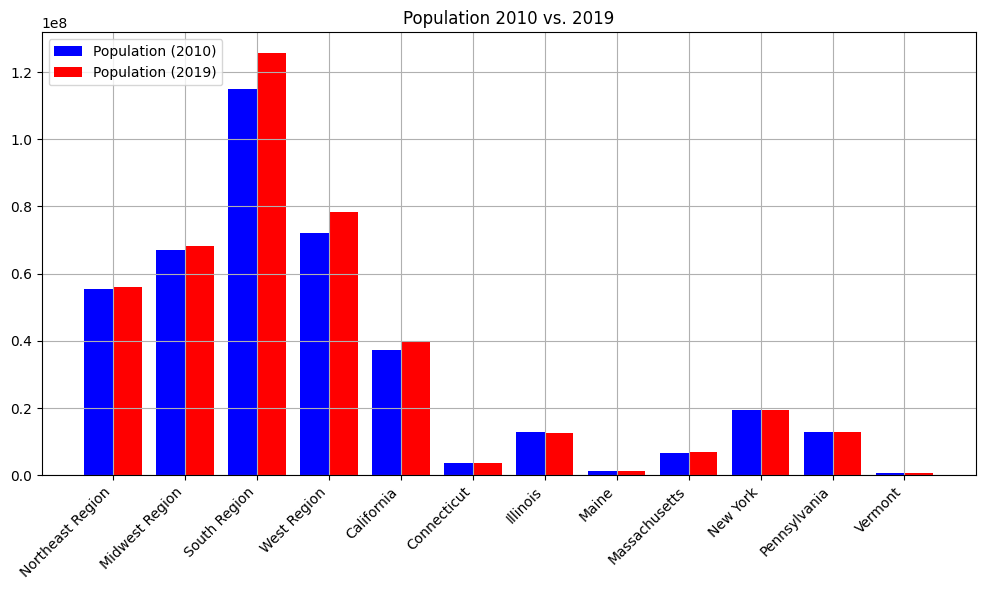

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Use numerical range for x-axis
x = range(len(df_pop_2010_2019))

# Plotting bars for 2010 and 2019
ax.bar([i - 0.2 for i in x], df_pop_2010_2019['POPESTIMATE2010'], color='blue', width=0.4, label='Population (2010)')
ax.bar([i + 0.2 for i in x], df_pop_2010_2019['POPESTIMATE2019'], color='red', width=0.4, label='Population (2019)')

ax.legend(loc='upper left')
ax.grid(True)

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(df_pop_2010_2019['NAME'], rotation=45, ha='right')
ax.set_title("Population 2010 vs. 2019")
plt.tight_layout()
plt.show()


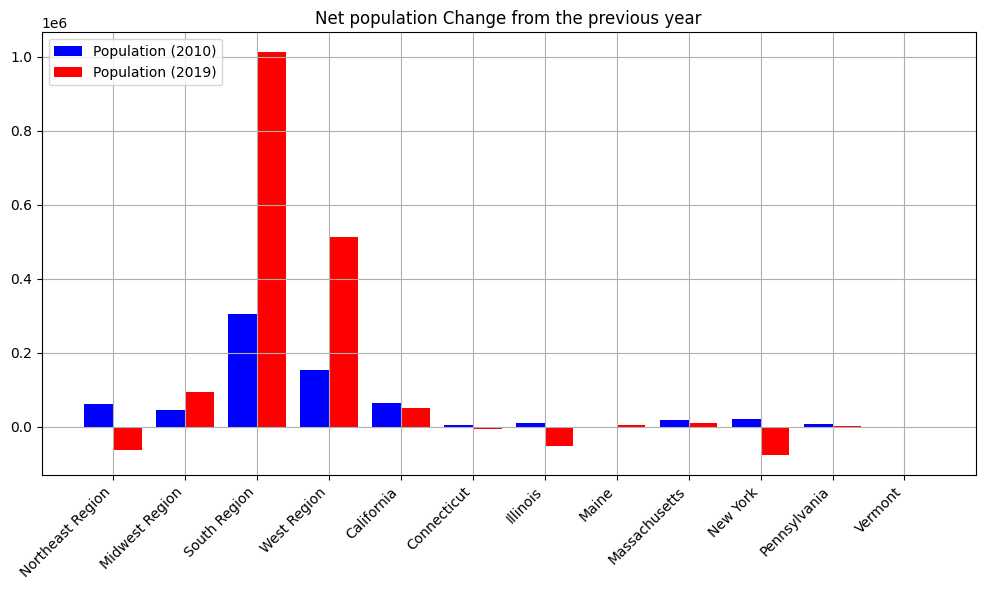

In [ ]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

# Use numerical range for x-axis
x1 = range(len(df_pop_2010_2019))

# Plotting bars for 2010 and 2019
ax1.bar([i - 0.2 for i in x], df_pop_2010_2019['NPOPCHG_2010'], color='blue', width=0.4, label='Population (2010)')
ax1.bar([i + 0.2 for i in x], df_pop_2010_2019['NPOPCHG_2019'], color='red', width=0.4, label='Population (2019)')

ax1.legend(loc='upper left')
ax1.grid(True)

# Set x-axis ticks and labels
ax1.set_xticks(x)
ax1.set_xticklabels(df_pop_2010_2019['NAME'], rotation=45, ha='right')
ax1.set_title("Net population Change from the previous year")
plt.tight_layout()
plt.show()

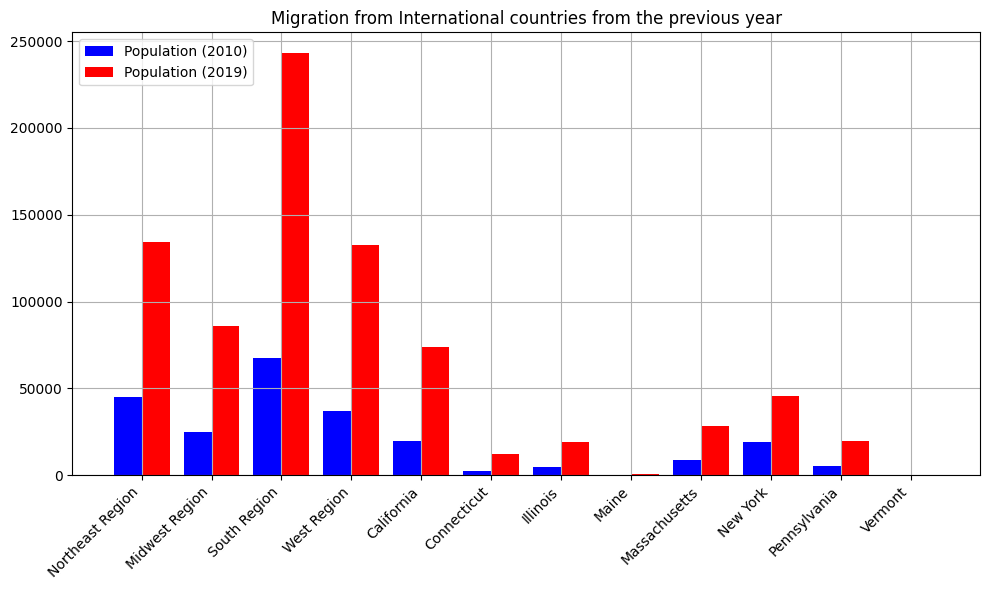

In [ ]:
fig, ax2 = plt.subplots(1, 1, figsize=(10, 6))

# Use numerical range for x-axis
x2 = range(len(df_pop_2010_2019))

# Plotting bars for 2010 and 2019
ax2.bar([i - 0.2 for i in x], df_pop_2010_2019['INTERNATIONALMIG2010'], color='blue', width=0.4, label='Population (2010)')
ax2.bar([i + 0.2 for i in x], df_pop_2010_2019['INTERNATIONALMIG2019'], color='red', width=0.4, label='Population (2019)')

ax2.legend(loc='upper left')
ax2.grid(True)

# Set x-axis ticks and labels
ax2.set_xticks(x)
ax2.set_xticklabels(df_pop_2010_2019['NAME'], rotation=45, ha='right')
ax2.set_title("Migration from International countries from the previous year")
plt.tight_layout()
plt.show()

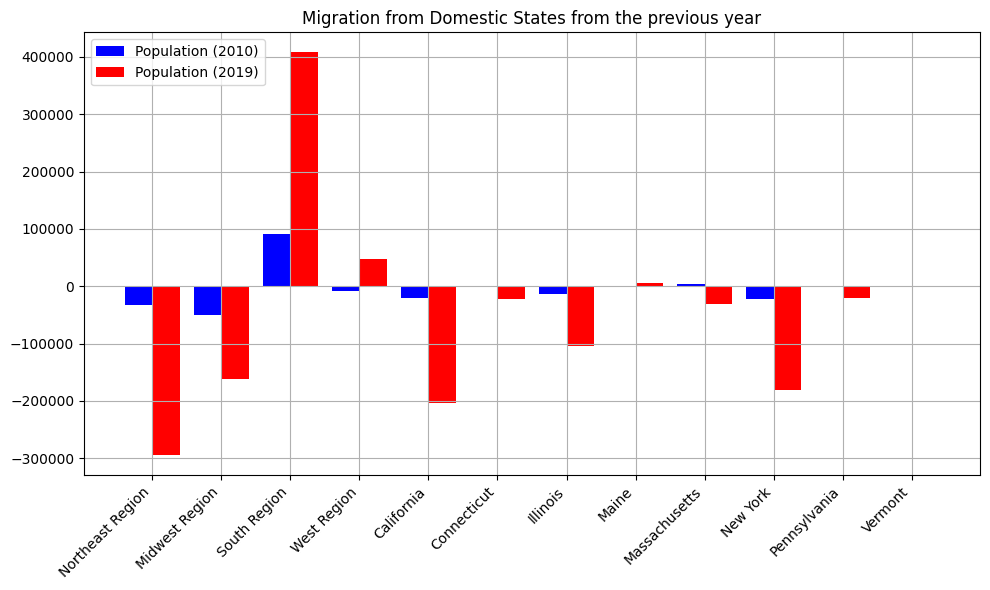

In [ ]:
fig, ax3 = plt.subplots(1, 1, figsize=(10, 6))

# Use numerical range for x-axis
x3 = range(len(df_pop_2010_2019))

# Plotting bars for 2010 and 2019
ax3.bar([i - 0.2 for i in x], df_pop_2010_2019['DOMESTICMIG2010'], color='blue', width=0.4, label='Population (2010)')
ax3.bar([i + 0.2 for i in x], df_pop_2010_2019['DOMESTICMIG2019'], color='red', width=0.4, label='Population (2019)')

ax3.legend(loc='upper left')
ax3.grid(True)

# Set x-axis ticks and labels
ax3.set_xticks(x3)
ax3.set_xticklabels(df_pop_2010_2019['NAME'], rotation=45, ha='right')
ax3.set_title("Migration from Domestic States from the previous year")
plt.tight_layout()
plt.show()

In [ ]:
US_map = folium.Map(location=[42, -102], zoom_start=4)
folium.Choropleth(
    geo_data = US_states, # Geo_data to be used
    data = df_pop_2010_2019_state, # Data used for visualization
    columns = ['NAME', 'DOMESTICMIG2019'], # First column is the key to match, second column is the value to display
    key_on = 'feature.properties.name', # The matched key in geo_data
    fill_color = 'OrRd', # Seelct a color scheme
    line_opacity = 0.2, # Select line opacity
    legend_name= 'Domestic Migration from 2018-19', # Choose a name for the legend
).add_to(US_map)
US_map

In [ ]:
penn_data = pd.read_csv('salesgeo.csv')
penn_data.columns

C:\Users\irith\AppData\Local\Temp\ipykernel_24784\2922231675.py:1: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  penn_data = pd.read_csv('salesgeo.csv')


Index(['PARID', 'PROPERTYHOUSENUM', 'PROPERTYFRACTION', 'PROPERTYADDRESSDIR',
       'PROPERTYADDRESSSTREET', 'PROPERTYADDRESSSUF',
       'PROPERTYADDRESSUNITDESC', 'PROPERTYUNITNO', 'PROPERTYCITY',
       'PROPERTYSTATE', 'PROPERTYZIP', 'SCHOOLCODE', 'SCHOOLDESC', 'MUNICODE',
       'MUNIDESC', 'RECORDDATE', 'SALEDATE', 'PRICE', 'DEEDBOOK', 'DEEDPAGE',
       'SALECODE', 'SALEDESC', 'INSTRTYP', 'INSTRTYPDESC', 'MUNICIPALITY',
       'NEIGHBORHOOD', 'PGH_COUNCIL_DISTRICT', 'PGH_WARD',
       'PGH_PUBLIC_WORKS_DIVISION', 'PGH_POLICE_ZONE', 'PGH_FIRE_ZONE',
       'TRACT', 'BLOCK_GROUP'],
      dtype='object')

In [ ]:
penn_data = penn_data[penn_data.MUNICIPALITY == 'Pittsburgh']

In [ ]:
best_neighborhoods_pittsburgh = ['Aspinwall',
    'Mount Washington',
    'Shadyside',
    'Strip District'
]
penn_data_good = penn_data[penn_data['NEIGHBORHOOD'].isin(best_neighborhoods_pittsburgh)]

In [ ]:
penn_data_good['NEIGHBORHOOD'].unique()

array(['Shadyside', 'Mount Washington', 'Strip District'], dtype=object)

In [ ]:
penn_data_good  = penn_data_good[['NEIGHBORHOOD', 'PRICE']]

In [ ]:
import random
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load

# machine learning
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
penn_data_good = penn_data_good.dropna()
X_train = penn_data_good['PRICE']
y_train = penn_data_good['NEIGHBORHOOD']

In [ ]:
X_train_reshaped = np.array(X_train).reshape(-1, 1)
y_train_reshaped = np.array(y_train).reshape(-1, 1)

# Create a pipeline with StandardScaler and Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

# Define the hyperparameter grid
param_grid = {'lr__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Create the GridSearchCV object
lr_grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
lr_grid.fit(X_train_reshaped, y_train_reshaped)

# Print the best parameter and score
print("Best parameter: ", lr_grid.best_params_)
print("Best score: ", lr_grid.best_score_)


C:\Users\irith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\irith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\irith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Best parameter:  {'lr__C': 1}
Best score:  0.6144037780401417


C:\Users\irith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\irith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\irith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

In [ ]:
lr_grid.predict([[400000]])

array(['Shadyside'], dtype=object)